# Post-processing of results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Helper utilities

In [2]:
XLIM = (1000, 3500)
YLIM = (-0.02, 1.02)


def load_data(fname, rename=None):
    """ Load OpenCalphad results in a standard fashion. """
    df = pd.read_csv(fname, sep=",", header=0)
    df = df.fillna(0.0).sort_values("T")
    df = df.groupby("T").mean().reset_index()

    if rename is not None:
        df.rename(columns=rename, inplace=True)
        
    return df


def plot_data(df, title, loc=1, xlim=XLIM, ylim=YLIM):
    """ Plot OpenCalphad results in a standard fashion. """
    T = df["T"].to_numpy()
    phases = df.columns[1:]

    plt.close("all")
    plt.style.use("seaborn-white")
    fig, ax = plt.subplots(figsize=(8, 6))

    for phase in phases:
        Y = df[phase].to_numpy()
        ax.plot(T, Y, label=phase)

    ax.grid(linestyle=":")

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    ax.set_title(title)
    ax.set_xlabel("Temperature [K]")
    ax.set_ylabel("Phase molar fraction")

    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles, labels, loc="lower left",
                    bbox_to_anchor=(1.0, 0.0), fancybox=True,
                    shadow=True)

    fig.tight_layout()
    return fig, (lgd,)

## Macro 01 - Melting of $\mathrm{Al_2O_3}$

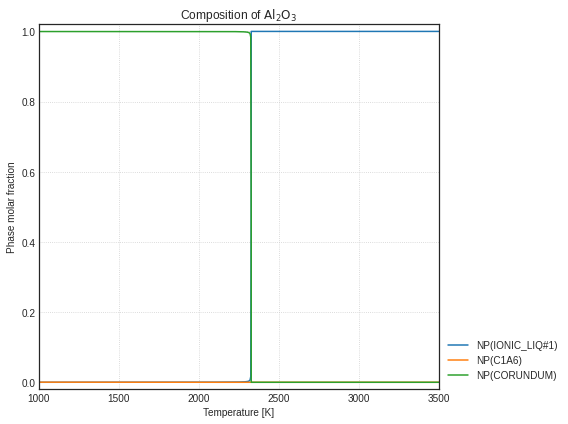

In [3]:
df = load_data("post/results-macro-01.csv")
fig, artists = plot_data(df, "Composition of $\\mathrm{Al_2O_3}$")
fig.savefig("post/results-macro-01.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

According to Hallstedt (1990) this melting should happen at 2327 K.

In [4]:
df.loc[df["NP(IONIC_LIQ#1)"] > 0.99].iloc[0]

T                  2326.96
NP(IONIC_LIQ#1)       1.00
NP(C1A6)              0.00
NP(CORUNDUM)          0.00
Name: 345, dtype: float64

## Macro 02 - Melting of $\mathrm{CaO}$

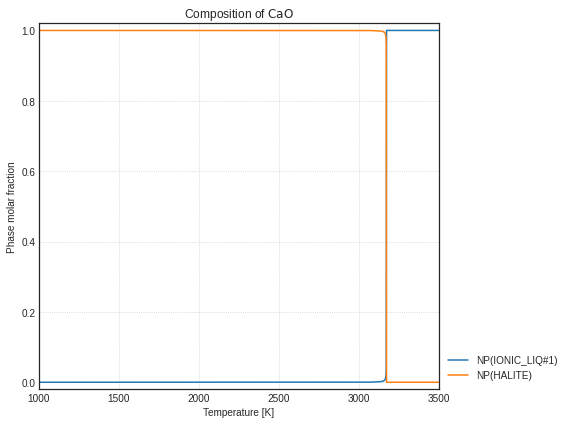

In [5]:
rename = {"NP(IONIC_..TO#2)": "NP(IONIC_LIQ#2)"}
df = load_data("post/results-macro-02.csv", rename=rename)

# There should be no liquid miscibility gap here!
df["NP(IONIC_LIQ#1)"] = df["NP(IONIC_LIQ#1)"] + df["NP(IONIC_LIQ#2)"]
df.drop(columns=["NP(IONIC_LIQ#2)"], inplace=True)

fig, artists = plot_data(df, "Composition of $\\mathrm{CaO}$")
fig.savefig("post/results-macro-02.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

According to Hallstedt (1990) this melting should happen at 3172 K.

In [6]:
df.loc[df["NP(IONIC_LIQ#1)"] > 0.99].iloc[0]

T                  3171.92
NP(IONIC_LIQ#1)       1.00
NP(HALITE)            0.00
Name: 1100, dtype: float64

## Macro 03 - Peritectic melting of $\mathrm{C_3A_1}$

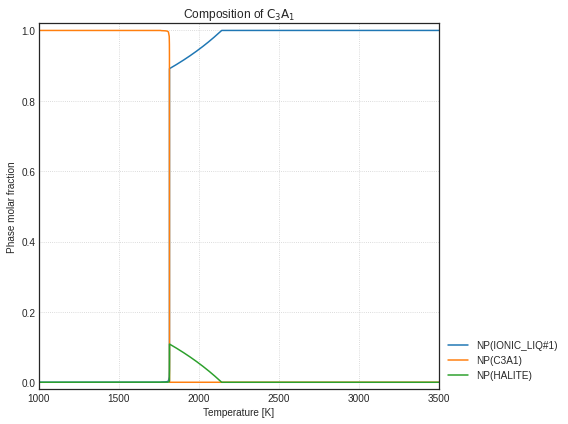

In [7]:
df = load_data("post/results-macro-03.csv")
fig, artists = plot_data(df, "Composition of $\\mathrm{C_3A_1}$")
fig.savefig("post/results-macro-03.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

According to Hallstedt (1990) this transformation should happen at 1817 K, (1814 K being the value reported by Nurse (1965), but since here we are not scanning the pure substance this value is acceptable).

In [8]:
df.loc[df["NP(HALITE)"] > 0.001].iloc[0]

T                  1815.000000
NP(IONIC_LIQ#1)       0.014882
NP(C3A1)              0.983287
NP(HALITE)            0.001832
Name: 208, dtype: float64

## Macro 04 - Melting of $\mathrm{C_1A_1}$

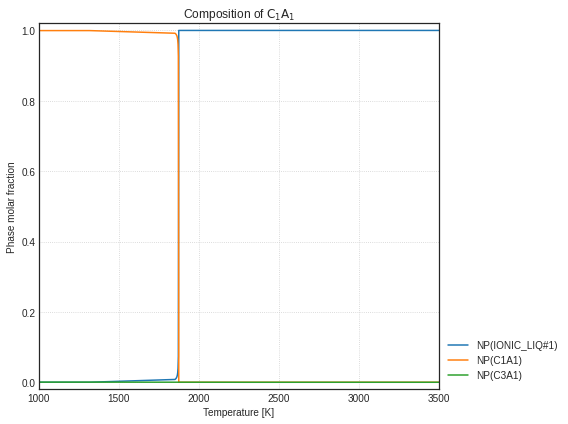

In [9]:
df = load_data("post/results-macro-04.csv")
fig, artists = plot_data(df, "Composition of $\\mathrm{C_1A_1}$")
fig.savefig("post/results-macro-04.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

According to Hallstedt (1990) this melting should happen at 1874 K.

In [10]:
df.loc[df["NP(IONIC_LIQ#1)"] > 0.99].iloc[0]

T                  1874.14
NP(IONIC_LIQ#1)       1.00
NP(C1A1)              0.00
NP(C3A1)              0.00
Name: 183, dtype: float64

## Macro 05 - Melting of $\mathrm{C_1A_2}$

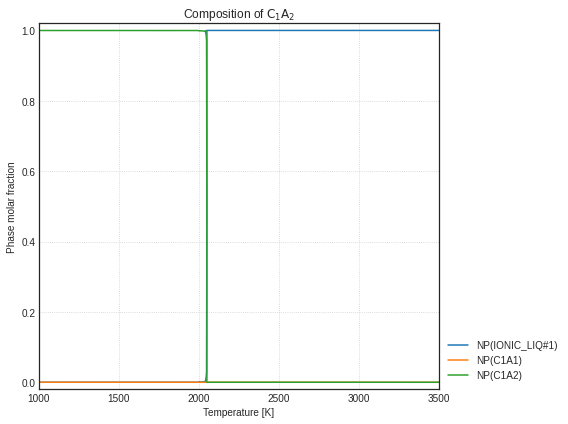

In [11]:
df = load_data("post/results-macro-05.csv")
fig, artists = plot_data(df, "Composition of $\\mathrm{C_1A_2}$")
fig.savefig("post/results-macro-05.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

According to Hallstedt (1990) this melting should happen at 2050 K.

In [12]:
df.loc[df["NP(IONIC_LIQ#1)"] > 0.99].iloc[0]

T                  2050.14
NP(IONIC_LIQ#1)       1.00
NP(C1A1)              0.00
NP(C1A2)              0.00
Name: 562, dtype: float64

## Macro 06 - Peritectic melting of $\mathrm{C_1A_6}$

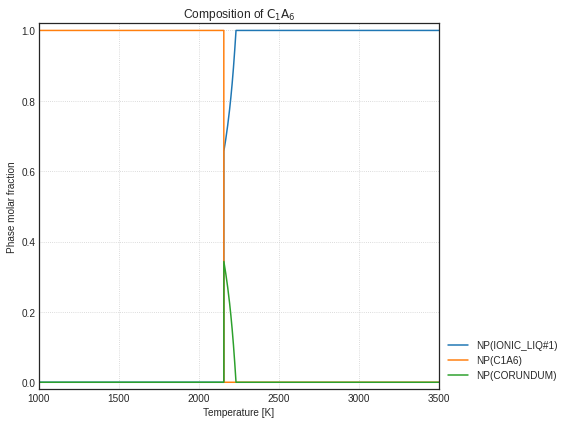

In [13]:
df = load_data("post/results-macro-06.csv")
fig, artists = plot_data(df, "Composition of $\\mathrm{C_1A_6}$")
fig.savefig("post/results-macro-06.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

According to Hallstedt (1990) this transformation should happen at 2156 K. Notice that formation of primary liquid here is not observed because composition is slighly to the Al-rich side of diagram.

In [14]:
df.loc[df["NP(CORUNDUM)"] > 0.2].iloc[0]

T                  2156.000000
NP(IONIC_LIQ#1)       0.656708
NP(C1A6)              0.000000
NP(CORUNDUM)          0.343292
Name: 294, dtype: float64

## Macro 07 - Domain $\mathrm{CaO - C_3A_1}$

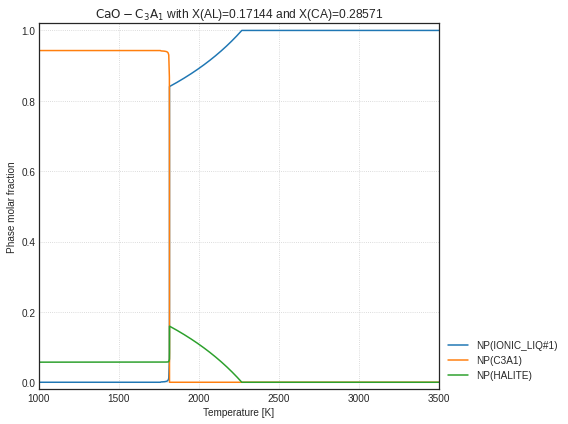

In [15]:
df = load_data("post/results-macro-07.csv")
title = "$\\mathrm{CaO - C_3A_1}$ with X(AL)=0.17144 and X(CA)=0.28571"
fig, artists = plot_data(df, title)
fig.savefig("post/results-macro-07.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

Below we check good agreement with corresponding peritectic point at 1817 K.

In [16]:
df.loc[df["NP(IONIC_LIQ#1)"] > 0.1].iloc[0]

T                  1816.270000
NP(IONIC_LIQ#1)       0.103111
NP(C3A1)              0.827197
NP(HALITE)            0.069692
Name: 210, dtype: float64

## Macro 08 - Domain $\mathrm{C_3A_1 - C_1A_1}$

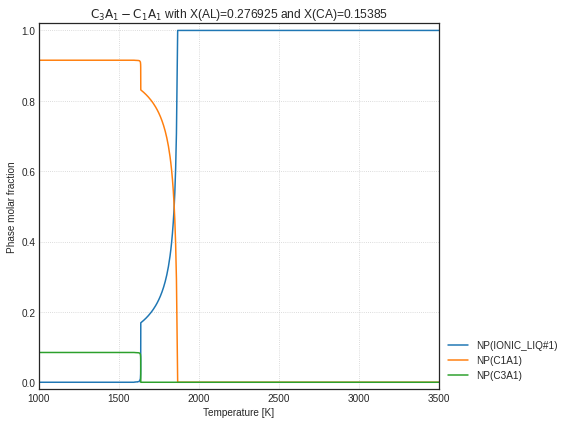

In [17]:
df = load_data("post/results-macro-08.csv")
title = "$\\mathrm{C_3A_1 - C_1A_1}$ with X(AL)=0.276925 and X(CA)=0.15385"
fig, artists = plot_data(df, title)
fig.savefig("post/results-macro-08.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

According to Hallstedt (1990) this eutectic melting should happen at 1638 K.

In [18]:
df.loc[df["NP(IONIC_LIQ#1)"] > 0.1].iloc[0]

T                  1637.340000
NP(IONIC_LIQ#1)       0.127145
NP(C1A1)              0.851886
NP(C3A1)              0.020969
Name: 135, dtype: float64

## Macro 09 - Domain $\mathrm{C_1A_1 - C_1A_2}$

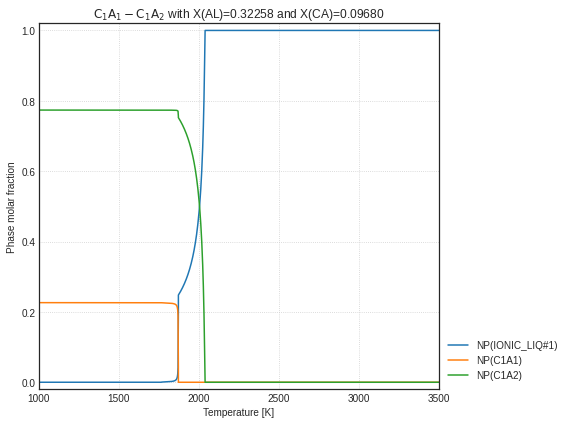

In [19]:
df = load_data("post/results-macro-09.csv")
title = "$\\mathrm{C_1A_1 - C_1A_2}$ with X(AL)=0.32258 and X(CA)=0.09680"
fig, artists = plot_data(df, title)
fig.savefig("post/results-macro-09.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

According to Hallstedt (1990) this melting should happen at 1873 K.

In [20]:
df.loc[df["NP(IONIC_LIQ#1)"] > 0.1].iloc[0]

T                  1872.000000
NP(IONIC_LIQ#1)       0.163384
NP(C1A1)              0.077184
NP(C1A2)              0.759432
Name: 437, dtype: float64

## Macro 10 - Domain $\mathrm{C_1A_2 - C_1A_6}$

**NOTE:** this region of the diagram has poor convergence with OpenCalphad.

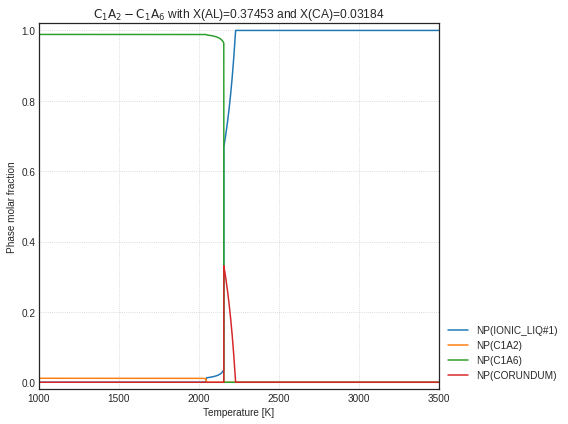

In [21]:
df = load_data("post/results-macro-10.csv")
title = "$\\mathrm{C_1A_2 - C_1A_6}$ with X(AL)=0.37453 and X(CA)=0.03184"
fig, artists = plot_data(df, title)
fig.savefig("post/results-macro-10.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

Below we check good agreement with corresponding peritectic point at 2156 K.

In [22]:
df.loc[df["NP(IONIC_LIQ#1)"] > 0.1].iloc[0]

T                  2155.770000
NP(IONIC_LIQ#1)       0.126384
NP(C1A2)              0.000000
NP(C1A6)              0.826331
NP(CORUNDUM)          0.047286
Name: 603, dtype: float64

We also check the peritectic at 2048 K.

In [23]:
df.loc[df["NP(C1A2)"] < 0.0001].iloc[0]

T                  2047.290000
NP(IONIC_LIQ#1)       0.012697
NP(C1A2)              0.000000
NP(C1A6)              0.987303
NP(CORUNDUM)          0.000000
Name: 536, dtype: float64

## Macro 11 - Domain $\mathrm{C_1A_6 - Al_2O_3}$

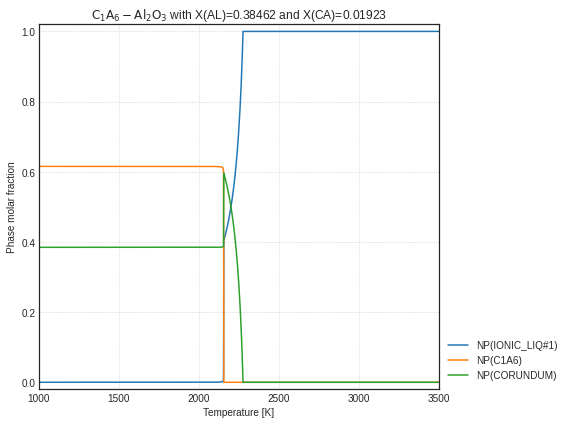

In [24]:
df = load_data("post/results-macro-11.csv")
title = "$\\mathrm{C_1A_6 - Al_2O_3}$ with X(AL)=0.38462 and X(CA)=0.01923"
fig, artists = plot_data(df, title)
fig.savefig("post/results-macro-11.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

Below we check good agreement with corresponding peritectic point at 2156 K.

In [25]:
df.loc[df["NP(IONIC_LIQ#1)"] > 0.1].iloc[0]

T                  2155.800000
NP(IONIC_LIQ#1)       0.403883
NP(C1A6)              0.000000
NP(CORUNDUM)          0.596117
Name: 587, dtype: float64